## Birthday Paradox

It still feels unbelievable that with 100 people that 99.99+% probability that 2 share the same birthday! 

**Let's do some random sampling and see. Then see how the theory compares.**

In [1]:
import random

def random_birthday():
	return random.randint(1, 365)

In [31]:
def simulate_room_shared(N=100):
	birthdays = set()
	for _ in range(N):
		bday = random_birthday()
		if bday in birthdays:
			return True
		birthdays.add(bday)
	return False

simulate_room_shared(100)	

True

What about 23 which should have a 50% chance at least one pair of people share a birthday?

Text(0.5, 0, 'number of people in room')

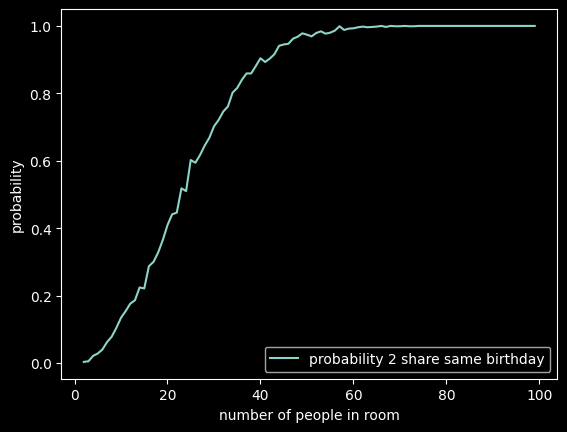

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def estimate_prob(N, trials=1_000):
	results = [int(simulate_room_shared(N)) for _ in range(trials)]
	return sum(results) / trials

r = range(2,100)
plt.plot(r,[estimate_prob(i) for i in r], label="probability 2 share same birthday")
plt.legend()
plt.ylabel("probability")
plt.xlabel("number of people in room")

### Average number of people that have at least another who shares the same birthday

Before I show this theoretically, what about generally speaking how many share a birthday?

100%|██████████| 50/50 [00:02<00:00, 20.79it/s]


Text(0.5, 0, 'number of people in room')

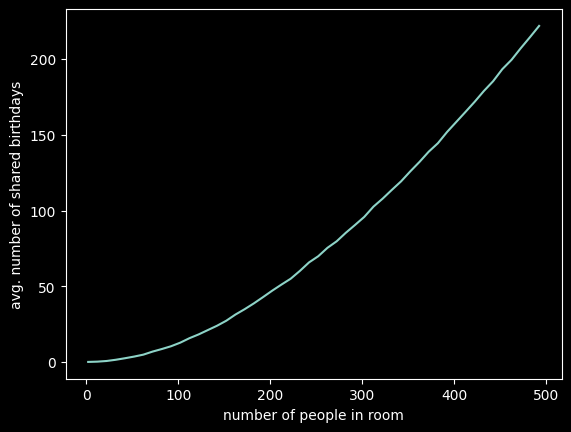

In [62]:
from tqdm import tqdm

def count_raw_shared_birthdays(N):
	shared = 0
	birthdays = set()
	for i in range(N):
		bday = random_birthday()
		if bday in birthdays:
			shared += 1
		birthdays.add(bday)
	return shared

def count_average_trials(N, trials=200):
	summed = 0
	for _ in range(trials):
		summed += count_raw_shared_birthdays(N)
	return summed / trials

r = range(2, 500, 10)
sim = [count_average_trials(i) for i in tqdm(r)]
plt.plot(r, sim)
plt.ylabel("avg. number of shared birthdays")
plt.xlabel("number of people in room")

### 3 share
What about the chance that 3 share the exact same birthday? How does it differ?
What about 4 and so on?

100%|██████████| 298/298 [00:10<00:00, 28.06it/s]


Text(0.5, 0, 'number of people in room')

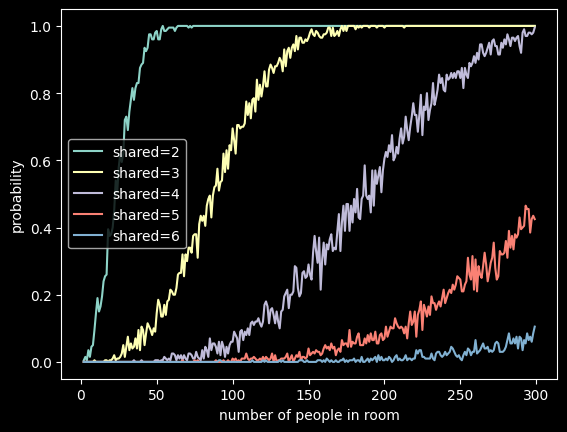

In [109]:
def count_bdays_random(N=100):
    birthdays = [0 for _ in range(365)]
    for _ in range(N):
        bday = random_birthday()
        birthdays[bday-1] += 1
    return birthdays

def any_shared(bdays, shared=2):
    return any([b >= shared for b in bdays]) 

def trials_n_shared(N, shared=2, trials=200):
    summed = 0
    for _ in range(trials):
        if any_shared(count_bdays_random(N), shared):
            summed += 1
    return summed/trials

r = range(2, 300)
shared = 6
for s in range(2, shared+1):
    plt.plot(r, [trials_n_shared(i, s) for i in tqdm(r)], label=f"shared={s}")
plt.legend()
plt.ylabel("probability")
plt.xlabel("number of people in room")

So there really is something magic about 2 people having shared. Since as you increase the number of the same shared birthday, the probability drops off greatly.

What is really cool is that for 300 people that is a near 100% chance that there is atleast one instance where 4 people all share the exact same birthday!

Which sort of bring of the interesting point: What is the min number of people in a room such that the given number of shared people on one birthday is 100% certain.

For example:

In [139]:
print(f"{trials_n_shared(80, shared=2)=}")
print(f"{trials_n_shared(200, shared=3)=}")
print(f"{trials_n_shared(350, shared=4)=}")
print(f"{trials_n_shared(550, shared=5)=}")
# ...?

trials_n_shared(80, shared=2)=1.0
trials_n_shared(200, shared=3)=1.0
trials_n_shared(350, shared=4)=1.0
trials_n_shared(550, shared=5)=1.0


Can I come up with a function that given the number shared $s$ returns the minimum number of people in a room that approaches 1.0 prob?

Theoretically probably more difficult so I'll just use my simulation code:

In [204]:
def min_room_per_n_shared(error_threshold=1e-3, n_shared=2, trials=100, min_n_room=0, skip=1):
	n_room = min_n_room
	while True: 
		prob = trials_n_shared(n_room, n_shared, trials)
		if (prob + error_threshold) >= 1.0:
			return n_room
		n_room += skip
		
print("min number of people to be certain 2 share:", min_room_per_n_shared(n_shared=2))

min number of people to be certain 2 share: 55


In [205]:
minN = []
shared = 10
skip = 1
for i in tqdm(range(2, shared+1)):
	mini = min_room_per_n_shared(n_shared=i, min_n_room=minN[-1] if len(minN) > 0 else 2, skip=skip)
	skip *= 2
	minN.append(mini)

100%|██████████| 9/9 [00:05<00:00,  1.75it/s]


Text(0.5, 0, 'n_shared')

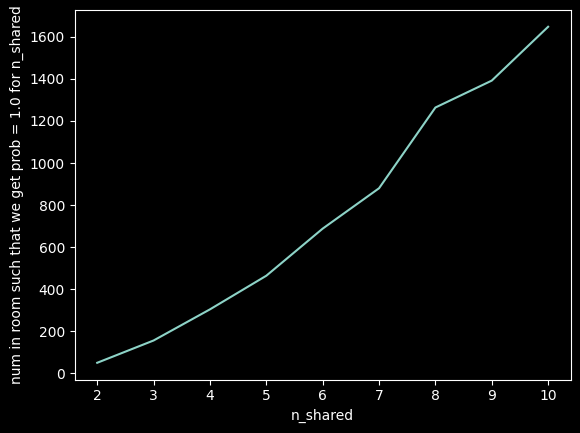

In [206]:
plt.plot(range(2, shared+1), minN)
plt.ylabel("num in room such that we get prob = 1.0 for n_shared")
plt.xlabel("n_shared")

Weird! Looks like a line

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[57, 142, 305, 457, 649, 800, 1033, 1270, 1451]


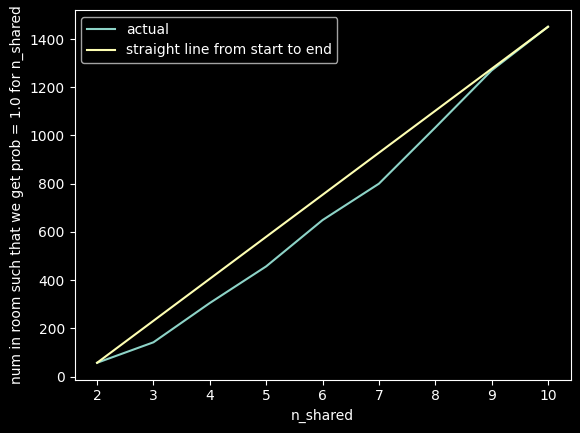

In [178]:
print(list(range(2, shared+1)))
print(minN)
plt.plot(range(2, shared+1), minN, label="actual")
plt.plot([2, 10], [57, 1451], label="straight line from start to end")
plt.ylabel("num in room such that we get prob = 1.0 for n_shared")
plt.xlabel("n_shared")
plt.legend()

But anything looks like a line if you look hard or close enough. Let's make some predictions about the number we need in a room such that 16 of the same shared birthday is a certainty (prob=1).


So just given the line I had, I get the slope of the line as 

$m=\frac{1451-57}{10-2}=174.25$

In [181]:
m = (1451-57) / (10-2)
m

174.25

Then to get the intercept, I get

$y = 174.25x + b$

or 

$y - 174.25x = b$

and sub the first value at 2,57 I get 

$b = 57 - 174.25(2) = -291.5$

In [183]:
b = 57 - m*2
b

-291.5

In [189]:
line = lambda x: m*x + b

print("predicted", line(16))
print("simulated", min_room_per_n_shared(n_shared=16, min_n_room=minN[-1], skip=50))

predicted 2496.5
simulated 2951
